# Hands-On Machine Learning Project
## Topic 20: Credit Data
### Florian Korn, Vincent Bläske, Dennis Götz

## IV. Prepare the Data
1. Clean the data:<br>
◦ Fix or remove outliers (optional).<br>
◦ Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns).
2. Perform feature selection (optional): Drop the attributes that provide no useful information for the task.
3. Perform feature engineering, where appropriate. For instance:<br>
◦ Discretize continuous features.<br>
◦ Decompose features (e.g., categorical, date/time, etc.).<br>
◦ Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).<br>
◦ Aggregate features into promising new features.
4. Perform feature scaling: Standardize or normalize features.

In [50]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Attributes
attributes = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount', 
           'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income', 
           'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property',
           'Age in years', 'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job',
           'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Credit rating']

# Load original dataset DATA-Format
data = pd.read_csv('german.data', sep=' ', header=None)
data.columns = attributes

# Load numerical dataset CSV-Format
data_num = pd.read_csv('german.data-numeric.csv', sep=';', header=None)

# Qualitative attributes
cat_attribs = ['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 
                'Present employment since', 'Personal status and sex', 'Other debtors / guarantors', 'Property',
                'Other installment plans', 'Housing', 'Job', 'Telephone', 'foreign worker', 'Credit rating']

# Numerical attributes
num_attribs = list(set(attributes) - set(cat_attribs))

# Copy the data to a new DataFrame
data_values = data.copy()

# Create dictionary with real values to make the DataFrame readable
cat_dict = {# Attribute 1: (qualitative) Status of existing checking account 
                    'A11' : '... < 0 DM',
                    'A12' : '0 <= ... < 200 DM',
                    'A13' : '... >= 200 DM / salary assignments for at least 1 year',
                    'A14' : 'no checking account',

                    # Attribute 3: (qualitative) Credit history 
                    'A30' : 'no credits taken/ all credits paid back duly',
                    'A31' : 'all credits at this bank paid back duly',
                    'A32' : 'existing credits paid back duly till now',
                    'A33' : 'delay in paying off in the past',
                    'A34' : 'critical account/ other credits existing (not at this bank)',
                    
                    # Attribute 4: (qualitative) Purpose 
                    'A40' : 'car (new)',
                    'A41' : 'car (used)',
                    'A42' : 'furniture/equipment',
                    'A43' : 'radio/television',
                    'A44' : 'domestic appliances',
                    'A45' : 'repairs',
                    'A46' : 'education',
                    'A47' : '(vacation - does not exist?)',
                    'A48' : 'retraining',
                    'A49' : 'business',
                    'A410' : 'others',

                    # Attibute 6: (qualitative) Savings account/bonds 
                    'A61' : '... < 100 DM',
                    'A62' : '100 <= ... < 500 DM',
                    'A63' : '500 <= ... < 1000 DM',
                    'A64' : '... >= 1000 DM',
                    'A65' : 'unknown/ no savings account',

                    # Attribute 7: (qualitative) Present employment since 
                    'A71' : 'unemployed',
                    'A72' : '... < 1 year',
                    'A73' : '1 <= ... < 4 years',
                    'A74' : '4 <= ... < 7 years',
                    'A75' : '... >= 7 years',

                    # Attribute 9: (qualitative) Personal status and sex 
                    'A91' : 'male : divorced/separated',
                    'A92' : 'female : divorced/separated/married',
                    'A93' : 'male : single',
                    'A94' : 'male : married/widowed',
                    'A95' : 'female : single',

                    # Attribute 10: (qualitative) Other debtors / guarantors 
                    'A101' : 'none',
                    'A102' : 'co-applicant',
                    'A103' : 'guarantor',

                    # Attribute 12: (qualitative) Property 
                    'A121' : 'real estate',
                    'A122' : 'if not A121 : building society savings agreement/ life insurance',
                    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
                    'A124' : 'unknown / no property',

                    # Attribute 14: (qualitative) Other installment plans 
                    'A141' : 'bank',
                    'A142' : 'stores',
                    'A143' : 'none',

                    # Attribute 15: (qualitative) Housing 
                    'A151' : 'rent',
                    'A152' : 'own',
                    'A153' : 'for free',

                    # Attribute 17: (qualitative) Job
                    'A171' : 'unemployed/ unskilled - non-resident',
                    'A172' : 'unskilled - resident',
                    'A173' : 'skilled employee / official',
                    'A174' : 'management/ self-employed/ highly qualified employee/ officer',

                    # Attribute 19: (qualitative) Telephone
                    'A191' : 'none',
                    'A192' : 'yes, registered under the customers name',

                    # Attribute 20: (qualitative) foreign worker 
                    'A201' : 'yes',
                    'A202' : 'no',

                    # Target value: (qualitative) Credit rating
                    1 : 'good',
                    2 : 'bad'
                    }

# Apply the dictionary to all categorical attributes of the new DataFrame to get the real values
data_values[cat_attribs] = pd.DataFrame([data_values[attribute].apply(lambda key: cat_dict[key]) for attribute in cat_attribs]).T

In [3]:
# Check for null values
is_null_check = pd.DataFrame(data_values.isnull().sum())
is_null_check[is_null_check[0] > 0]

,0


In [51]:
# Handling Text and Categorical Attributes (gleiches Ergebnis wie bei Flo! Nur haben sind die Attribute unterschiedlich nummeriert.)
data_cat = data_values[cat_attribs]

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

# Replace the categories by numbers
data_encoded_ordinal = data_values.copy()
data_encoded_ordinal[cat_attribs] = data_cat_encoded

# **Thoughts about the features**
* **Status of existing checking account** <br>
Maybe usefull for determining credit rating, as we know the customer and the financial situation.<br>
Importance: (++)
* **Duration in month**<br>
This feature could give us further insights if we have a good or bad credit rating, as financial unstable customers would lend small amounts with small durations (they need money asap). But also could lend money for a long period in smaller amounts than the good credits, as they need small installment rates to be able to spend money monthly.<br>
Importance: (++)
* **Credit history**<br>
Should be usefull and it is very important, as it tells us if existing credits are paid back duly or if it is a critical account.<br>
Importance: (+++)
* **Purpose**<br>
Could be usefull. It tells us about the data that the credits are mostly consum credits (as there is no category house).<br>
Importance: (0)
* **Credit Amount**<br>
Should be usefull as high amounts are different to small amounts and can influence the ML model (if good or bad credit rating)<br>
Importance: (++)
* **Savings account / bonds**<br>
Could give us more information about the financial situation of the customer, if he has savings.<br>
Importance: (+)
* **Present employment**<br>
To pay our installment the customer should have a work. This could influence the credit rating if he doesn't work and puts us at risk if the credit could default.<br>
Importance: (++)
* **Installment rate % of income**<br>
It should be important as this determines if the customer can pay our installments or not and therefore influence the credit rating.<br>
Importance: (++)
* **Personal status and sex**<br>
It could be important as a maried person has a houshold income to pay the installments. The gender should not be important.<br>
Importance: (+)
* **Other debtors / gurantors**<br>
This should influence the rating as solvent customers don't need other debtors / gurantors. On the other hand it could raise the credit rating because more people are responsible to pay the installment.<br>
Importance: (++)
* **Present residence since**<br>
Should be not important for itself, could be important if combined with property feature. As customer can change their residence without conflicting their solvency, but if they have a new house etc. this will influence their possible spendings for the installment.<br>
Importance: (---/++)
* **Property**<br>
The importance for itself is okayish, could be important combined with Present residence since feature (see above).<br>
Importance: (+/++)
* **Age in years**<br>
Young people have a different spending profile, not much savings and change a lot in their lifestyle. This could influence the credit rating. Old people could be more conservative and solid.<br>
Importance: (+)
* **Other installment plans**<br>
Could influence the credit rating as people have limited income and therefore must manage their finances to pay the installments.<br>
Importance: (+)
* **Housing**<br>
For itself rather unimportant but combined with property and others could be important.<br>
Importance: (0/+)
* **Number of existing credits**<br>
Should be important as this determines if we have history with this customer and if he is financially solvent to pay installments.<br>
Importance: (++)
* **Job**<br>
Should be very important. Determines personal income and solvency.<br>
Importance: (+++)
* **# of People being liable**<br>
Could be important as we have more people to pay the installments. Therefore higher solvency but also more trouble if customer can't pay.<br>
Importance: (++)
* **Telephone**<br>
Should be not important at all if he has a telephone.<br>
Importance: (---)
* **Foreign Worker**<br>
Should not determine if he is solvent or not. Also foreign worker can have high level jobs with good payment and therefore solvency.<br>
Importance: (--)

# **Feature Selection** <br>

## **Status of existing checking account** <br>
We would include this feature as we see patterns in the data. Good credit ratings are seven times more likely to have no checking account with us. The other categories are similar to each other or not a big difference between the good and bad credit ratings. Contrary to our thoughts about the feature it is not determining for a good credit rating if we know the customer through a checking account.

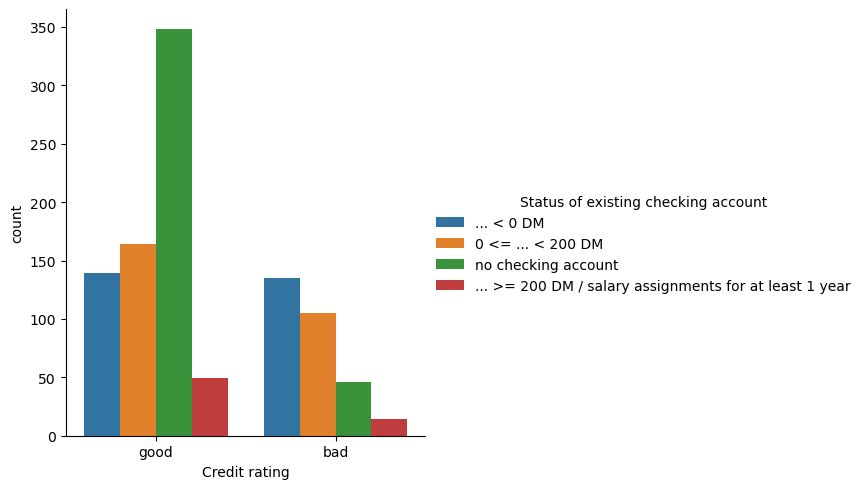

In [83]:
sns.catplot(data = data_values, x="Credit rating", hue="Status of existing checking account", kind="count")
plt.show()

## **Duration in month** <br>
We would include this feature, as we see differences between good and bad ratings and duration (short duration: good, long duration: tendency to bad). A closer look between the features "credit amount" and "duration in month" we see no big difference. Only for the duration 6 months we see a credit amount over 2.500 results often in a bad credit rating. For the other durations it looks similar distributed between good and bad credit rating.<br>

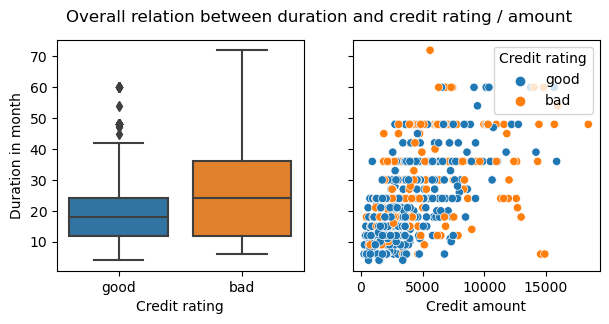

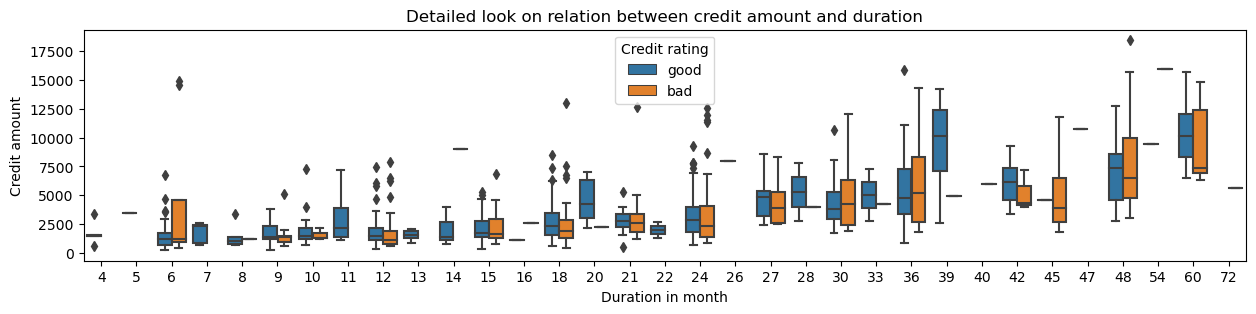

In [82]:
fig, ax = plt.subplots(1,2, figsize = (7,3), sharey = True)
fig.suptitle('Overall relation between duration and credit rating / amount')
sns.boxplot(ax = ax[0], x = data_values['Credit rating'], y = data_values['Duration in month'])
sns.scatterplot(ax = ax[1], x = data_values['Credit amount'], y = data_values['Duration in month'], hue = data_values['Credit rating'])
plt.figure(figsize = (15,3))
sns.boxplot(data_values, x = 'Duration in month', y = 'Credit amount', hue = 'Credit rating')
plt.title('Detailed look on relation between credit amount and duration')
plt.show()

## **Credit History** <br>
This feature should be included as we see differences between good and bad credit ratings in relation to credit history. Good credit ratings have often existing credits and pay duly. Bad credit ratings often don't have existing credits. Interessting is that bad credit ratings are less likely to pay back delayed than good credit ratings.

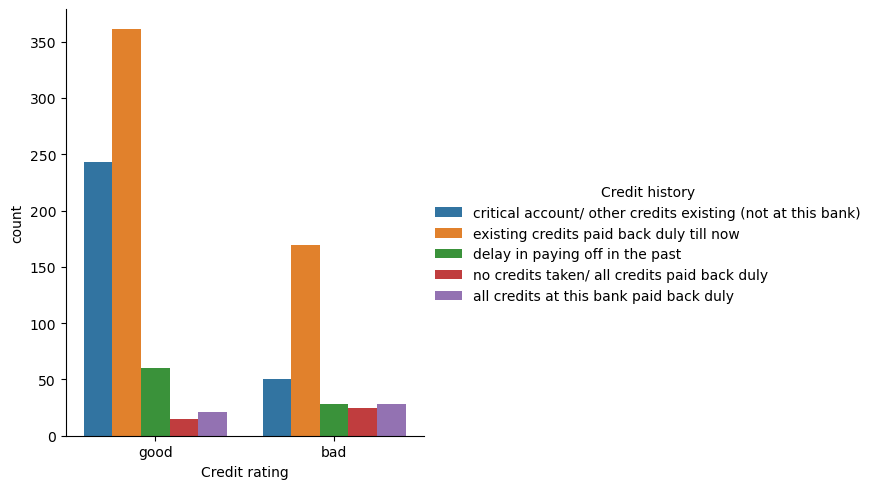

In [78]:
sns.catplot(data = data_values, x="Credit rating", hue="Credit history", kind="count")
plt.show()

## **Purpose** <br>
We see there systematic patterns as good credit ratings have often the purpose to buy a radio / tv. Only looking at the bad credit ratings, they are mostly for new cars. In relation to the credit amount we see that good credits had low credit amounts for radio / tv. For the purpose education, car (used), business and others we see that high amounts lead more likely to bad credit ratings. Therefore we would include this feature, too.

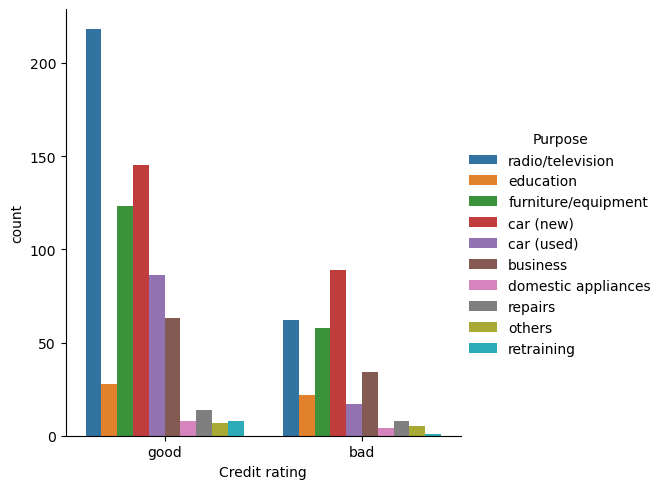

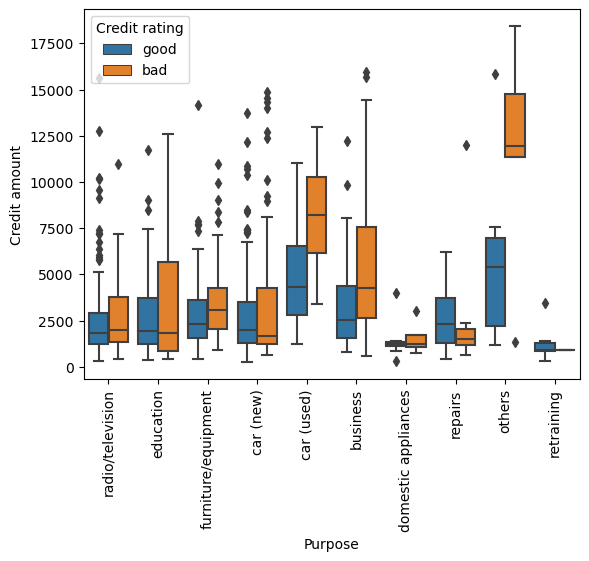

In [106]:
sns.catplot(data = data_values, x="Credit rating", hue="Purpose", kind="count")
plt.show()
sns.boxplot(y = data_values['Credit amount'], x = data_values['Purpose'], hue = data_values['Credit rating']).set_xticklabels(data_values['Purpose'].unique(), rotation = 90)
plt.show()

## **Credit Amount** <br>
Here we see that mostly amounts between 1.500 and 3.750 lead to good credit ratings and amounts between 1.500 to 5.000 to bad credit ratings. There is a soft pattern. But as we have seen in previous feature selections that the amount corresponds with purpose and duration. Therefore it should be included.

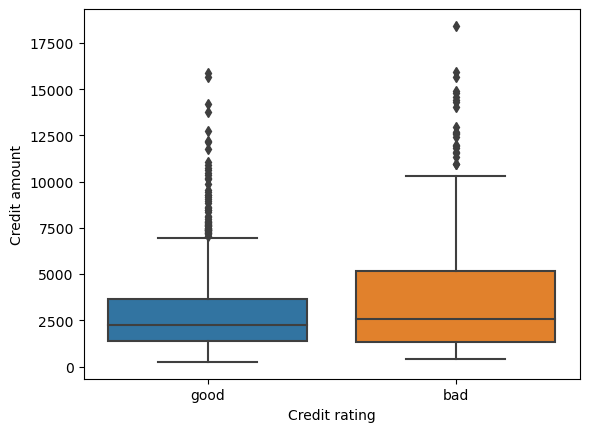

In [111]:
sns.boxplot(x = data_values['Credit rating'], y = data_values['Credit amount'])
plt.show()

## **Savings account/bonds** <br>
This feature doesn't seem to provide a lot of systematic patterns. The only big differences is absolut to unknown savings / no savings and < 100 DM. But they have the same distribution as it seems graphically. The boxplots look similar. We would rather not deploy this feature, but we will see later in the selection process (forward / backward selection).

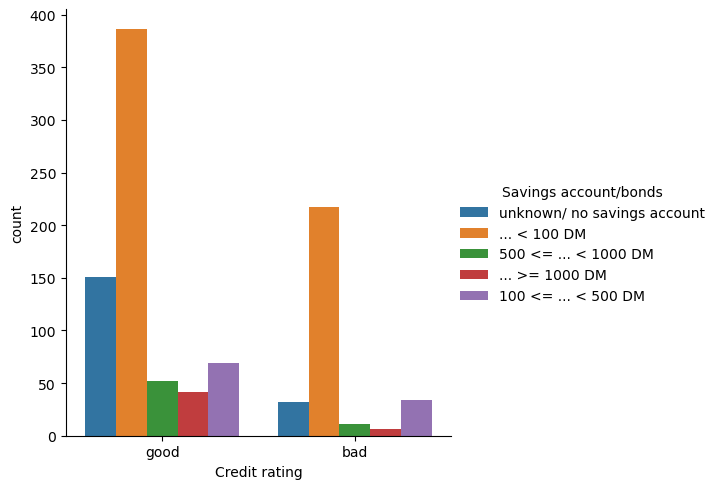

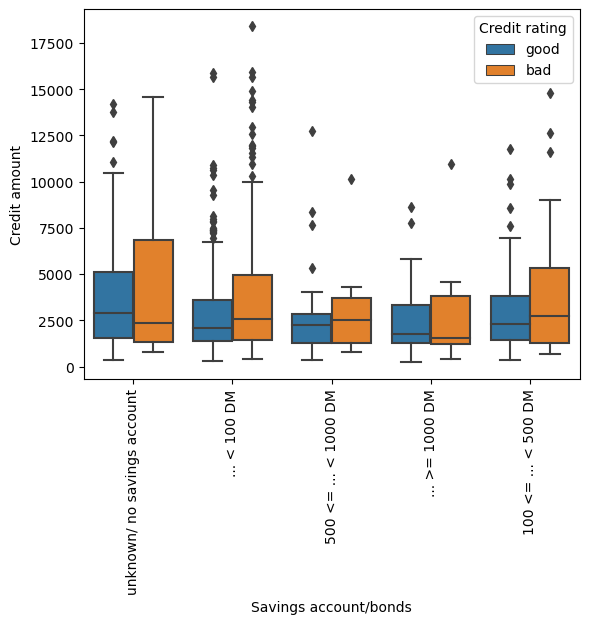

In [113]:
sns.catplot(data = data_values, x="Credit rating", hue="Savings account/bonds", kind="count")
plt.show()
sns.boxplot(y = data_values['Credit amount'], x = data_values['Savings account/bonds'], hue = data_values['Credit rating']).set_xticklabels(data_values['Savings account/bonds'].unique(), rotation = 90)
plt.show()

## **Present employment since** <br>
We see that 1 - 4 years of employment leads with a high likelihood to good credit ratings. But we also see in the group of bad credit ratings that 1 - 4 years of employment have often no saving accounts which leads in the bad credit rating group to the highest absolut amount. We would include this feature as it has different systematic patterns and differs with other features to more specific insights.

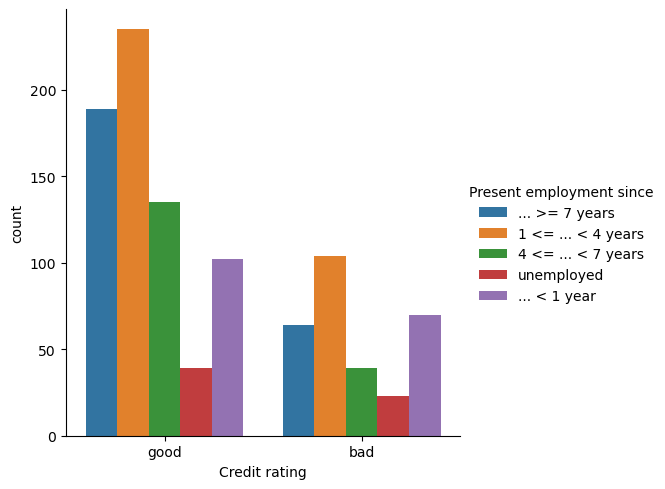

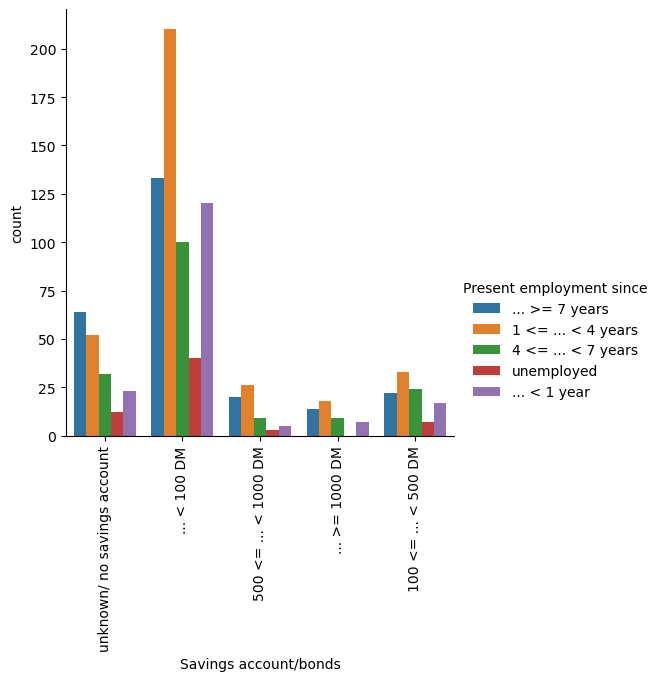

In [125]:
sns.catplot(data = data_values, x="Credit rating", hue="Present employment since", kind="count")
plt.show()
sns.catplot(data = data_values, x='Savings account/bonds', hue="Present employment since", kind="count").set_xticklabels(data_values['Savings account/bonds'].unique(), rotation = 90)
plt.show()

# **Installment rate in percentage of disposable income**
This feature doesn't show us much systematic patterns. We see that mostly 4 % installment rate leads to good or bad credit rating. The distribution seems somehow similar inbetween the categories. Therefore we would rather not include this feature. But the statistical significance can also be determined by the forward / backward selection.

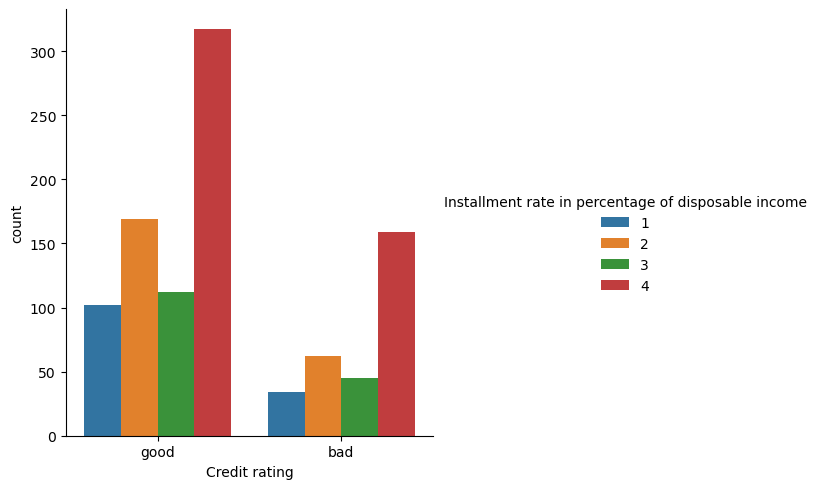

In [127]:
sns.catplot(data = data_values, x="Credit rating", hue="Installment rate in percentage of disposable income", kind="count")
plt.show()

# **Personal status and sex**
We see that single males are more likely to get a good credit rating. Between divorced / seperated / married female it doesn't differ that much (between good and bad credit rating). This feature could give us something but there could be a bias in the data, as we don't have single or widowed females in the data. Our ML model would learn to mostly give a good credit rating to single male's. Also the categories seem differently build (female has divorce, separated and married togheter, male only divorce and seperated). Therefore we don't include this feature.

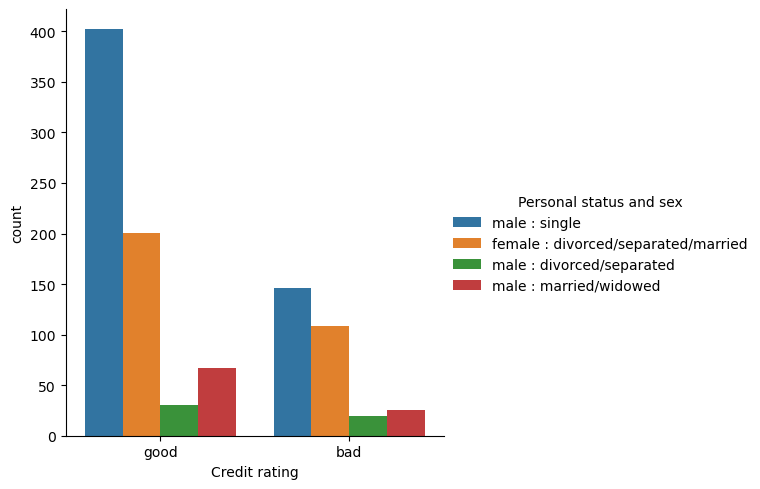

In [128]:
sns.catplot(data = data_values, x="Credit rating", hue="Personal status and sex", kind="count")
plt.show()

In [116]:
data_values.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Credit rating'],
      dtype='object')

In [57]:
# Create a Test Set
train_set, test_set = train_test_split(data_values, train_size=0.8, random_state=0, stratify=data_values['Credit rating'])

# Separate features and target values in train and test set
X_train = np.array(train_set.iloc[:, :20])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :20])
y_test = np.array(test_set.iloc[:, -1])

print(f'{X_train.shape = }')
print(f'{X_test.shape = }\n')

# Check if training and test set have the same target-value-ratio
print('Ratio of target value good (1) in y_train: {:.2f} %'.format(100*np.sum(y_train == 'good')/len(y_train)))
print('Ratio of target value good (1) in y_test: {:.2f} %'.format(100*np.sum(y_test == 'good')/len(y_test)))

X_train.shape = (800, 20)
X_test.shape = (200, 20)

Ratio of target value good (1) in y_train: 70.00 %
Ratio of target value good (1) in y_test: 70.00 %


## V. Shortlist Promising Models
1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, kNN, SVM, random forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance:<br>
◦ For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm (e.g., the features with the largest coefficients in a linear regression model).
4. Analyze the types of errors the models make: What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that make different types of errors.

Note: If the dataset is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time <br>
(be aware that this penalizes complex models such as large neural nets or random forests).

�� Don’t tweak your model after measuring the generalization error: you would just start overfitting the test
set.